In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
data = pd.read_excel("boxplot data.xlsx", sheet_name = None)
data_15 = data.get("1,5")
data_18 = data.get("1,8")
data_48 = data.get("4,8")
data_46 = data.get("4,6")

[[-8.20336474360901, -7.7436120661875, -7.283859388765991], [-12.547648794420633, -12.110815487218751, -11.67398218001687], [-12.658223831909208, -12.251818561281251, -11.845413290653294], [-4.8002575535153476, -4.385107843375, -3.9699581332346514], [-3.144998261592767, -2.7148774560625, -2.284756650532233], [12.034194887865134, 12.516260041750002, 12.99832519563487], [2.1108086961556314, 2.55148585125, 2.9921630063443683]]
[[0.18051080225410715, 0.19085197276218124, 0.20119314327025534], [0.20996193594594437, 0.21962488694217408, 0.2292878379384038], [0.10380124792451445, 0.11528767540823516, 0.12677410289195587], [-0.018800757703725364, -0.007520849003556087, 0.0037590596966131876], [-0.01177644653392379, 0.0005373287167846855, 0.012851103967493161], [-0.05349898027251112, -0.04258407205820375, -0.03166916384389638], [-0.020079241109854852, -0.008370153122002661, 0.0033389348658495275]]
[[-7.904094021297026, -7.47510966253125, -7.046125303765474], [-12.353101101696149, -11.9512769082

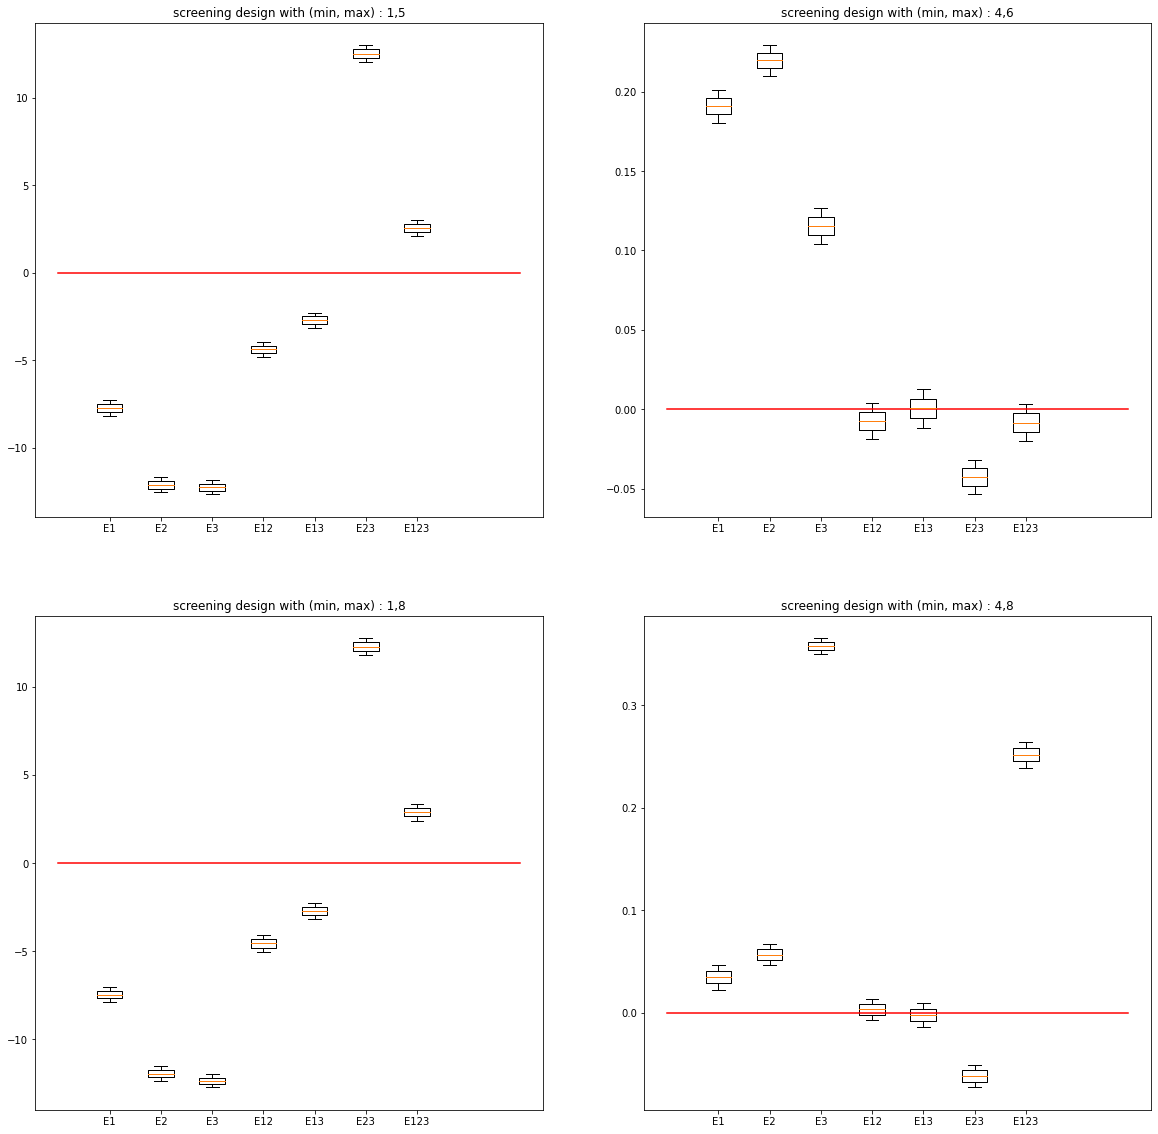

In [6]:
plt.figure(figsize=(20,20))
i = 0
for element in data.items():
    df = element[1]
    key = element[0]
    intervallist = []
    i+=1
    for col in df.columns:
        effect = df[col]
        mu = effect.mean()
        sigma = effect.std()
        k = 1.96


        upbound = mu + k*sigma/np.sqrt(32)
        lowbound = mu - k*sigma/np.sqrt(32)
        # collect difference between sample mean and mu
        intervallist.append([lowbound,mu,upbound])


    print(intervallist)
    # set figure size.
    plt.subplot(2,2,i)
    # plot box plots of each sample mean.
    plt.title('screening design with (min, max) : '+str(key))
    plt.boxplot(intervallist)
    plt.plot([0, 9],[0,0],color='red')
    plt.xticks(range(1,8), labels=df.columns)

# show plot.
plt.show()